In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import trompy as tp

%run "..//src//vgp_helper_fx"

In [5]:
DATA_FOLDER = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\"

#casein session
animal="VGP403"
day="034"
day_meta='034'
date="20230324"



s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

# events_file = os.path.join(DATA_FOLDER,
#                            "behav",
#                            "sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv"
#                            .format(animal, day, date))

# to get event file in single folder
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.3.xls',sheetname='Behavior')
folder= 'C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Bonsai\\'


for row in rows: 
    if row[0]== animal and row[4] == day_meta: 
        events_file=folder+row[1]

data = assemble_data(s2p_folder,events_file,animal="VGP403", diet="NR", solution="Casein")

File is excel file. Making csv metafile first


In [6]:
s2p_length=len(data['raw_F'][0,:])
pump_frames,lick_frames=get_frames(events_file,s2p_length)

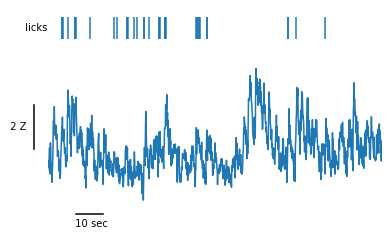

In [75]:
def z_score(signal):
    mean=np.mean(signal)
    sd=np.std(signal)
    z=(signal-mean)/sd
    
    return z

start_frame=6000
n_frames=1200
frames_to_plot=range(start_frame,start_frame+n_frames)
cell_to_plot=44
licks_to_plot=[lick-start_frame for lick in lick_frames]
signal_to_plot = z_score(data['raw_F'][cell_to_plot,frames_to_plot])



f,ax=plt.subplots()
ax.plot(signal_to_plot)
ax.vlines(licks_to_plot,5,6)
ax.set_xlim(0,n_frames)

#time scale bar
scale_bar_y=-3
scale_bar_x=100
ax.plot([scale_bar_x,scale_bar_x+100],[scale_bar_y,scale_bar_y],color='k')
ax.text(scale_bar_x+50,scale_bar_y-0.2,' 10 sec',ha='center',va='top')

# z scale bar
scale_bar_y=0
scale_bar_x=-50
ax.plot([scale_bar_x,scale_bar_x],[scale_bar_y,scale_bar_y+2],color='k',clip_on=False)

ax.text(scale_bar_x-25,scale_bar_y+1,' 2 Z',ha='right',va='center')

ax.text(0,5.5,' licks',ha='right',va='center')
tp.invisible_axes(ax)


In [38]:
len(data['raw_F'])

83

In [67]:
tp.invisible_axes?

Signature: tp.invisible_axes(ax)
Docstring: Sets axes to invisible. 
File:      c:\users\mko102\anaconda3\lib\site-packages\trompy\fig_utils.py
Type:      function
